# Initialization, Loading Modules

In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

from transformers import BertTokenizer, BertModel
from sklearn.decomposition import PCA

import joblib

In [2]:
BASE_PATH = "C:\\Users\\iitsh\\OneDrive\\Documents\\Datasets and Models"
DATA_FOLDER = "mimic-iii-clinical-database-1.4"

In [3]:
def path(csv_name):
    return os.path.join(BASE_PATH, DATA_FOLDER, csv_name + ".csv")
path("ICUSTAYS")

'C:\\Users\\iitsh\\OneDrive\\Documents\\Datasets and Models\\mimic-iii-clinical-database-1.4\\ICUSTAYS.csv'

# Baseline

In [5]:
icustays = pd.read_csv(path("ICUSTAYS"))
icustays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [6]:
icustays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW_ID          61532 non-null  int64  
 1   SUBJECT_ID      61532 non-null  int64  
 2   HADM_ID         61532 non-null  int64  
 3   ICUSTAY_ID      61532 non-null  int64  
 4   DBSOURCE        61532 non-null  object 
 5   FIRST_CAREUNIT  61532 non-null  object 
 6   LAST_CAREUNIT   61532 non-null  object 
 7   FIRST_WARDID    61532 non-null  int64  
 8   LAST_WARDID     61532 non-null  int64  
 9   INTIME          61532 non-null  object 
 10  OUTTIME         61522 non-null  object 
 11  LOS             61522 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 5.6+ MB


In [7]:
admissions = pd.read_csv(path("ADMISSIONS"))
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [8]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [9]:
patients = pd.read_csv(path("PATIENTS"))
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [10]:
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ROW_ID       46520 non-null  int64 
 1   SUBJECT_ID   46520 non-null  int64 
 2   GENDER       46520 non-null  object
 3   DOB          46520 non-null  object
 4   DOD          15759 non-null  object
 5   DOD_HOSP     9974 non-null   object
 6   DOD_SSN      13378 non-null  object
 7   EXPIRE_FLAG  46520 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 2.8+ MB


In [11]:
print(admissions.shape)
print(admissions["HADM_ID"].nunique())

(58976, 19)
58976


In [12]:
print(patients.shape)
print(patients["SUBJECT_ID"].nunique())

(46520, 8)
46520


In [13]:
set(icustays["HADM_ID"].unique()) == set(admissions["HADM_ID"].unique())

False

In [14]:
icustays["HADM_ID"].nunique()

57786

In [15]:
set(admissions["SUBJECT_ID"].unique()) == set(patients["SUBJECT_ID"].unique())

True

In [16]:
combined_df = icustays.merge(admissions, on = "HADM_ID", suffixes = (None, "_Y"))
combined_df.shape

(61532, 30)

In [17]:
combined_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,...,Medicare,NaN,CATHOLIC,SEPARATED,HISPANIC OR LATINO,2198-02-11 09:41:00,2198-02-11 15:18:00,DYSPNEA,1,1
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,...,Medicaid,NaN,UNOBTAINABLE,SINGLE,WHITE,2170-11-05 07:22:00,2170-11-05 12:15:00,SEPSIS;PILONIDAL ABSCESS,0,1
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,...,Medicare,NaN,JEHOVAH'S WITNESS,MARRIED,UNKNOWN/NOT SPECIFIED,NaN,NaN,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT,0,1
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,...,Private,ENGL,NOT SPECIFIED,MARRIED,PATIENT DECLINED TO ANSWER,NaN,NaN,GALLSTONE PANCREATITIS,0,1
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,...,Medicare,NaN,UNOBTAINABLE,MARRIED,WHITE,NaN,NaN,PULMONARY EMBOLIS,0,1


In [18]:
combined_df["SUBJECT_ID"] == combined_df["SUBJECT_ID_Y"]

0        True
1        True
2        True
3        True
4        True
         ... 
61527    True
61528    True
61529    True
61530    True
61531    True
Length: 61532, dtype: bool

In [19]:
combined_df = combined_df.merge(patients, on = "SUBJECT_ID", suffixes = (None, "_Y"))
combined_df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,...,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_Y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,...,DYSPNEA,1,1,251,F,2132-02-21 00:00:00,2198-02-18 00:00:00,2198-02-18 00:00:00,NaN,1
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,...,SEPSIS;PILONIDAL ABSCESS,0,1,252,M,2130-09-30 00:00:00,NaN,NaN,NaN,0
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,...,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT,0,1,253,M,2048-05-26 00:00:00,NaN,NaN,NaN,0
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,...,GALLSTONE PANCREATITIS,0,1,254,F,2074-11-30 00:00:00,NaN,NaN,NaN,0
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,...,PULMONARY EMBOLIS,0,1,255,M,2119-11-21 00:00:00,NaN,NaN,NaN,0


In [20]:
combined_df.info(max_cols = 100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ROW_ID                61532 non-null  int64  
 1   SUBJECT_ID            61532 non-null  int64  
 2   HADM_ID               61532 non-null  int64  
 3   ICUSTAY_ID            61532 non-null  int64  
 4   DBSOURCE              61532 non-null  object 
 5   FIRST_CAREUNIT        61532 non-null  object 
 6   LAST_CAREUNIT         61532 non-null  object 
 7   FIRST_WARDID          61532 non-null  int64  
 8   LAST_WARDID           61532 non-null  int64  
 9   INTIME                61532 non-null  object 
 10  OUTTIME               61522 non-null  object 
 11  LOS                   61522 non-null  float64
 12  ROW_ID_Y              61532 non-null  int64  
 13  SUBJECT_ID_Y          61532 non-null  int64  
 14  ADMITTIME             61532 non-null  object 
 15  DISCHTIME          

In [21]:
print(combined_df["DIAGNOSIS"].nunique())
combined_df[combined_df['DIAGNOSIS'].isnull()]

15249


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,...,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,ROW_ID_Y,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
27781,33560,26443,147575,283217,carevue,MICU,MICU,52,52,2183-01-13 20:20:51,...,NaN,0,1,24956,M,2096-04-22 00:00:00,2183-04-24 00:00:00,2183-04-24 00:00:00,2183-04-24 00:00:00,1


In [22]:
combined_df["DBSOURCE"].nunique()

3

In [23]:
combined_df["FIRST_CAREUNIT"].nunique()

6

In [24]:
combined_df["LAST_CAREUNIT"].nunique()

6

In [25]:
combined_df["FIRST_WARDID"].nunique()

16

In [26]:
combined_df["ADMISSION_TYPE"].nunique()

4

In [27]:
combined_df["ADMISSION_LOCATION"].nunique()

9

In [28]:
combined_df["INSURANCE"].nunique()

5

In [29]:
list(combined_df["DIAGNOSIS"].unique())

['DYSPNEA',
 'SEPSIS;PILONIDAL ABSCESS',
 'CAROTID STENOSIS\\CAROTID ANGIOGRAM AND STENT',
 'GALLSTONE PANCREATITIS',
 'PULMONARY EMBOLIS',
 'POLYSUBSTANCE OVERDOSE',
 'SUBARACHNOID HEMORRHAGE',
 'UROSEPSIS-CHANGE IN MENTAL STATUS',
 'GASTROINTESTINAL BLEED',
 'NEWBORN',
 'ENDOSCOPIC RETROGRADE CHOLANGIOPANCREATOGRAPHY;SPHINCTEROTOMY',
 'PNEUMONIA,HYPONATREMIA',
 'RIGHT HIP FRACTURE',
 'PNEUMONIA',
 'CHANGE IN MENTAL STATUS;SEIZURES',
 'SPINAL INJURY',
 'ASTHMA, COPD EXACERBATION',
 'INFECTED RIGHT FOOT',
 'ADENO CANCER ETHMOID SINUS /SDA',
 'FEVER,ALTERED MENTAL STATUS',
 'ESOPHAGEAL DYSPLASIA/SDA',
 'CHEST PAIN',
 'ACUTE CORONARY SYNDROME',
 'ALTERED MENTAL STATUS',
 'CIRRHOSIS',
 'ASD\\REPAIR ATRIAL-SEPTAL DEFECT/SDA',
 'S/P MI;ISCHEMIC LEFT LEG',
 'ANEURYSM/SDA',
 'LOWER GI BLEED',
 'HYPERBILIRUBINEMIA',
 'DEHYDRATION',
 'ACUTE MYOCARDIAL INFARCTION',
 'MULTI-TRAUMA',
 'TYLENOL,OVERDOSE;LIVER FAILURE',
 'ICH',
 'CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT',
 'NON-ST SEGME

In [30]:
print(list(combined_df.columns))

['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ICUSTAY_ID', 'DBSOURCE', 'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'FIRST_WARDID', 'LAST_WARDID', 'INTIME', 'OUTTIME', 'LOS', 'ROW_ID_Y', 'SUBJECT_ID_Y', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'ROW_ID_Y', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN', 'EXPIRE_FLAG']


In [31]:
combined_df2_columns = ['DBSOURCE', 'FIRST_CAREUNIT', 'LAST_CAREUNIT', 'ADMITTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG', 'GENDER', 'EXPIRE_FLAG', 'LOS']
combined_df2 = combined_df[combined_df2_columns]
combined_df2.head()

,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,ADMITTIME,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,GENDER,EXPIRE_FLAG,LOS
0,carevue,MICU,MICU,2198-02-11 13:40:00,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,NaN,CATHOLIC,SEPARATED,HISPANIC OR LATINO,DYSPNEA,1,F,1,3.2490
1,carevue,MICU,MICU,2170-11-05 11:04:00,EMERGENCY,EMERGENCY ROOM ADMIT,Medicaid,NaN,UNOBTAINABLE,SINGLE,WHITE,SEPSIS;PILONIDAL ABSCESS,0,M,0,3.2788
2,carevue,CCU,CCU,2128-06-23 18:26:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,NaN,JEHOVAH'S WITNESS,MARRIED,UNKNOWN/NOT SPECIFIED,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT,0,M,0,2.8939
3,carevue,MICU,SICU,2120-08-07 18:56:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,ENGL,NOT SPECIFIED,MARRIED,PATIENT DECLINED TO ANSWER,GALLSTONE PANCREATITIS,0,F,0,2.0600
4,carevue,CCU,CCU,2186-12-25 21:06:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,NaN,UNOBTAINABLE,MARRIED,WHITE,PULMONARY EMBOLIS,0,M,0,1.6202


In [32]:
combined_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DBSOURCE              61532 non-null  object 
 1   FIRST_CAREUNIT        61532 non-null  object 
 2   LAST_CAREUNIT         61532 non-null  object 
 3   ADMITTIME             61532 non-null  object 
 4   ADMISSION_TYPE        61532 non-null  object 
 5   ADMISSION_LOCATION    61532 non-null  object 
 6   INSURANCE             61532 non-null  object 
 7   LANGUAGE              35378 non-null  object 
 8   RELIGION              61052 non-null  object 
 9   MARITAL_STATUS        51292 non-null  object 
 10  ETHNICITY             61532 non-null  object 
 11  DIAGNOSIS             61531 non-null  object 
 12  HOSPITAL_EXPIRE_FLAG  61532 non-null  int64  
 13  GENDER                61532 non-null  object 
 14  EXPIRE_FLAG           61532 non-null  int64  
 15  LOS                

In [39]:
combined_df3 = combined_df2.drop(["DIAGNOSIS", "ADMITTIME"], axis = 1).dropna()
combined_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34096 entries, 3 to 61531
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DBSOURCE              34096 non-null  object 
 1   FIRST_CAREUNIT        34096 non-null  object 
 2   LAST_CAREUNIT         34096 non-null  object 
 3   ADMISSION_TYPE        34096 non-null  object 
 4   ADMISSION_LOCATION    34096 non-null  object 
 5   INSURANCE             34096 non-null  object 
 6   LANGUAGE              34096 non-null  object 
 7   RELIGION              34096 non-null  object 
 8   MARITAL_STATUS        34096 non-null  object 
 9   ETHNICITY             34096 non-null  object 
 10  HOSPITAL_EXPIRE_FLAG  34096 non-null  int64  
 11  GENDER                34096 non-null  object 
 12  EXPIRE_FLAG           34096 non-null  int64  
 13  LOS                   34096 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 3.9+ MB


In [40]:
cat_df3 = pd.get_dummies(combined_df3.select_dtypes(include = ["object"]), prefix_sep = ": ")
cat_df3.shape

(34096, 173)

In [41]:
list(cat_df3.columns)

['DBSOURCE: both',
 'DBSOURCE: carevue',
 'DBSOURCE: metavision',
 'FIRST_CAREUNIT: CCU',
 'FIRST_CAREUNIT: CSRU',
 'FIRST_CAREUNIT: MICU',
 'FIRST_CAREUNIT: NICU',
 'FIRST_CAREUNIT: SICU',
 'FIRST_CAREUNIT: TSICU',
 'LAST_CAREUNIT: CCU',
 'LAST_CAREUNIT: CSRU',
 'LAST_CAREUNIT: MICU',
 'LAST_CAREUNIT: NICU',
 'LAST_CAREUNIT: SICU',
 'LAST_CAREUNIT: TSICU',
 'ADMISSION_TYPE: ELECTIVE',
 'ADMISSION_TYPE: EMERGENCY',
 'ADMISSION_TYPE: NEWBORN',
 'ADMISSION_TYPE: URGENT',
 'ADMISSION_LOCATION: ** INFO NOT AVAILABLE **',
 'ADMISSION_LOCATION: CLINIC REFERRAL/PREMATURE',
 'ADMISSION_LOCATION: EMERGENCY ROOM ADMIT',
 'ADMISSION_LOCATION: HMO REFERRAL/SICK',
 'ADMISSION_LOCATION: PHYS REFERRAL/NORMAL DELI',
 'ADMISSION_LOCATION: TRANSFER FROM HOSP/EXTRAM',
 'ADMISSION_LOCATION: TRANSFER FROM OTHER HEALT',
 'ADMISSION_LOCATION: TRANSFER FROM SKILLED NUR',
 'ADMISSION_LOCATION: TRSF WITHIN THIS FACILITY',
 'INSURANCE: Government',
 'INSURANCE: Medicaid',
 'INSURANCE: Medicare',
 'INSURANCE: Pri

In [42]:
num_df3 = combined_df3.select_dtypes(include = ["number"])
num_df3.columns

Index(['HOSPITAL_EXPIRE_FLAG', 'EXPIRE_FLAG', 'LOS'], dtype='object')

In [43]:
final_df = pd.concat([cat_df3, num_df3], axis = 1)
final_df.shape

(34096, 176)

In [51]:
# final_df.to_csv("intermediate.csv")

In [18]:
final_df = pd.read_csv("intermediate.csv")
final_df = final_df.drop(["Unnamed: 0"], axis = 1)
final_df.head()

,DBSOURCE: both,DBSOURCE: carevue,DBSOURCE: metavision,FIRST_CAREUNIT: CCU,FIRST_CAREUNIT: CSRU,FIRST_CAREUNIT: MICU,FIRST_CAREUNIT: NICU,FIRST_CAREUNIT: SICU,FIRST_CAREUNIT: TSICU,LAST_CAREUNIT: CCU,...,ETHNICITY: WHITE,ETHNICITY: WHITE - BRAZILIAN,ETHNICITY: WHITE - EASTERN EUROPEAN,ETHNICITY: WHITE - OTHER EUROPEAN,ETHNICITY: WHITE - RUSSIAN,GENDER: F,GENDER: M,HOSPITAL_EXPIRE_FLAG,EXPIRE_FLAG,LOS
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,0,0,2.0600
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,0,0,1.4862
2,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,0,1,8.8143
3,False,True,False,True,False,False,False,False,False,True,...,True,False,False,False,False,False,True,1,1,7.1314
4,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,0,0,28.6880


In [32]:
final_df = final_df[final_df["EXPIRE_FLAG"] == 0].drop(["HOSPITAL_EXPIRE_FLAG"], axis = 1)

In [39]:
final_df.shape

(21551, 175)

In [33]:
X = final_df.drop(['LOS'], axis = 1)
y = final_df['LOS']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [35]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state = 0),
    'Random Forest': RandomForestRegressor(random_state = 0),
    'Gradient Boosting': GradientBoostingRegressor(random_state = 0)
}

In [36]:
for model in models.values():
    model.fit(X_train, y_train)

In [37]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  R^2 Score: {r2:.2f}")
    print()

Linear Regression:
  Mean Squared Error: 105948157557257717940224.00
  Mean Absolute Error: 10660107534.75
  R^2 Score: -4350292944055134846976.00

Ridge Regression:
  Mean Squared Error: 22.65
  Mean Absolute Error: 2.52
  R^2 Score: 0.07

Lasso Regression:
  Mean Squared Error: 24.36
  Mean Absolute Error: 2.55
  R^2 Score: -0.00

Decision Tree:
  Mean Squared Error: 36.11
  Mean Absolute Error: 2.93
  R^2 Score: -0.48

Random Forest:
  Mean Squared Error: 25.30
  Mean Absolute Error: 2.64
  R^2 Score: -0.04

Gradient Boosting:
  Mean Squared Error: 21.70
  Mean Absolute Error: 2.44
  R^2 Score: 0.11



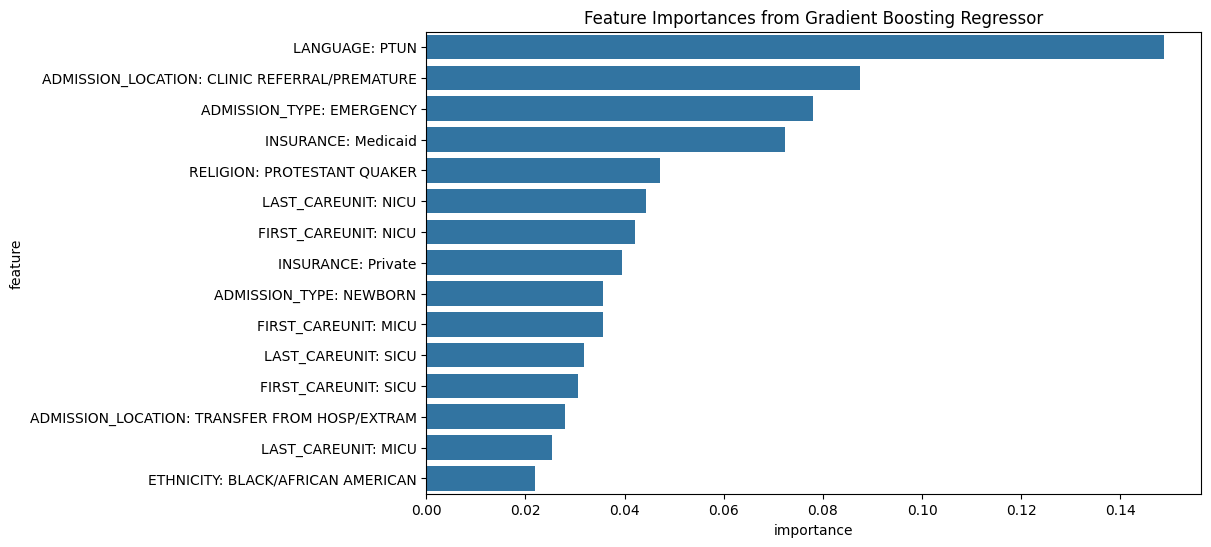

In [38]:
feature_importances_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': models["Gradient Boosting"].feature_importances_
}).sort_values(by = "importance", ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x = 'importance', y = 'feature', data = feature_importances_gb.head(15))
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.show()

In [16]:
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7]
}

gb_model = GradientBoostingRegressor(random_state = 0)
grid_search_gb = GridSearchCV(estimator = gb_model, param_grid = param_grid_gb, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=0),
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [17]:
print("Gradient Boosting - Best Parameters:", grid_search_gb.best_params_)

Gradient Boosting - Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [18]:
gb_model = grid_search_gb.best_estimator_
y_pred = gb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"  Mean Squared Error: {mse:.2f}")
print(f"  Mean Absolute Error: {mae:.2f}")
print(f"  R^2 Score: {r2:.2f}")

  Mean Squared Error: 28.86
  Mean Absolute Error: 2.91
  R^2 Score: 0.06


# Final

## Loading Data

In [46]:
admissions = pd.read_csv(path("ADMISSIONS"))
patients = pd.read_csv(path("PATIENTS"))
icustays = pd.read_csv(path("ICUSTAYS"))
labevents = pd.read_csv(path("LABEVENTS"))
outputevents = pd.read_csv(path("OUTPUTEVENTS"))
labitems = pd.read_csv(path("D_LABITEMS"))
items = pd.read_csv(path("D_ITEMS"))

In [26]:
labevents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27854055 entries, 0 to 27854054
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ROW_ID      int64  
 1   SUBJECT_ID  int64  
 2   HADM_ID     float64
 3   ITEMID      int64  
 4   CHARTTIME   object 
 5   VALUE       object 
 6   VALUENUM    float64
 7   VALUEUOM    object 
 8   FLAG        object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.9+ GB


In [43]:
print(labevents["ITEMID"].nunique())
print(labitems["ITEMID"].nunique())

726
753


In [44]:
print(labevents["HADM_ID"].nunique())
print(admissions["HADM_ID"].nunique())

58151
58976


In [47]:
print(outputevents["ITEMID"].nunique())
print(items["ITEMID"].nunique())

1155
12487


In [48]:
set(outputevents["ITEMID"].unique()) - set(items["ITEMID"].unique())

set()

## Labevents Transformation

In [57]:
lab_itemid_counts = labevents.groupby('ITEMID')['HADM_ID'].nunique().reset_index()
lab_itemid_counts.columns = ['ITEMID', 'HADM_ID_COUNT']
lab_itemid_counts = lab_itemid_counts.sort_values(by='HADM_ID_COUNT', ascending=False).reset_index(drop=True)
# lab_itemid_counts.head(20)

In [58]:
lab_itemid_counts = lab_itemid_counts.head(20).merge(labitems, on = ["ITEMID"], suffixes = (None, "_Y"))
lab_itemid_counts

,ITEMID,HADM_ID_COUNT,ROW_ID,LABEL,FLUID,CATEGORY,LOINC_CODE
0,51221,57102,421,Hematocrit,Blood,Hematology,4544-3
1,51301,56991,501,White Blood Cells,Blood,Hematology,804-5
2,51265,56976,465,Platelet Count,Blood,Hematology,777-3
3,51222,56950,422,Hemoglobin,Blood,Hematology,718-7
4,51249,56942,449,MCHC,Blood,Hematology,786-4
5,51250,56941,450,MCV,Blood,Hematology,787-2
6,51279,56941,479,Red Blood Cells,Blood,Hematology,789-8
7,51248,56941,448,MCH,Blood,Hematology,785-6
8,51277,56933,477,RDW,Blood,Hematology,788-0
9,50971,52878,172,Potassium,Blood,Chemistry,2823-3


In [ ]:
# output_itemid_counts = outputevents.groupby('ITEMID')['HADM_ID'].nunique().reset_index()
# output_itemid_counts.columns = ['ITEMID', 'HADM_ID_COUNT']
# output_itemid_counts = output_itemid_counts.sort_values(by='HADM_ID_COUNT', ascending=False).reset_index(drop=True)
# output_itemid_counts.head(20)

In [ ]:
# output_itemid_counts = output_itemid_counts.head(20).merge(items, on = ["ITEMID"], suffixes = (None, "_Y"))
# output_itemid_counts

In [59]:
labevents = labevents[labevents["ITEMID"].isin(list(lab_itemid_counts["ITEMID"]))]
labevents.shape

(15089484, 9)

In [60]:
labevents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15089484 entries, 11 to 27854054
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ROW_ID      int64  
 1   SUBJECT_ID  int64  
 2   HADM_ID     float64
 3   ITEMID      int64  
 4   CHARTTIME   object 
 5   VALUE       object 
 6   VALUENUM    float64
 7   VALUEUOM    object 
 8   FLAG        object 
dtypes: float64(2), int64(3), object(4)
memory usage: 1.1+ GB


In [61]:
labevents = labevents.merge(labitems, on = ["ITEMID"], suffixes = (None, "_Y"))

In [62]:
labevents.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ROW_ID_Y,LABEL,FLUID,CATEGORY,LOINC_CODE
0,292,3,NaN,50868,2101-10-13 03:00:00,13,13.0,mEq/L,NaN,69,Anion Gap,Blood,Chemistry,1863-0
1,305,3,NaN,50868,2101-10-13 15:47:00,14,14.0,mEq/L,NaN,69,Anion Gap,Blood,Chemistry,1863-0
2,317,3,NaN,50868,2101-10-14 03:00:00,12,12.0,mEq/L,NaN,69,Anion Gap,Blood,Chemistry,1863-0
3,363,3,NaN,50868,2101-10-15 03:30:00,15,15.0,mEq/L,NaN,69,Anion Gap,Blood,Chemistry,1863-0
4,383,3,NaN,50868,2101-10-15 12:15:00,14,14.0,mEq/L,NaN,69,Anion Gap,Blood,Chemistry,1863-0


In [63]:
labevents["LABEL"].nunique()

20

In [64]:
labevents = labevents[["HADM_ID", "LABEL", "VALUENUM"]].dropna()
labevents.shape

(11847784, 3)

In [65]:
labevents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11847784 entries, 6 to 15089483
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   HADM_ID   float64
 1   LABEL     object 
 2   VALUENUM  float64
dtypes: float64(2), object(1)
memory usage: 361.6+ MB


In [68]:
labevents2 = labevents.pivot_table(index = "HADM_ID", columns = "LABEL", values = "VALUENUM")
labevents2.columns.name = None
labevents2.index = labevents2.index.map(int)
labevents2.head()

,Anion Gap,Bicarbonate,"Calcium, Total",Chloride,Creatinine,Glucose,Hematocrit,Hemoglobin,MCH,MCHC,MCV,Magnesium,Phosphate,Platelet Count,Potassium,RDW,Red Blood Cells,Sodium,Urea Nitrogen,White Blood Cells
HADM_ID,,,,,,,,,,,,,,,,,,,,
100001,16.642857,19.714286,8.554545,107.214286,2.214286,165.428571,32.157143,11.114286,28.285714,34.571429,81.857143,1.941667,2.954545,364.428571,4.035714,13.942857,3.930000,139.571429,28.571429,10.400000
100003,11.166667,19.666667,7.940000,105.833333,1.083333,96.833333,27.781818,9.214286,31.342857,33.900000,92.428571,1.800000,3.560000,145.285714,4.783333,20.457143,2.940000,132.000000,34.500000,13.328571
100006,8.461538,29.384615,8.477778,97.615385,0.638462,105.000000,31.853846,10.600000,32.892308,33.338462,98.538462,1.572727,3.960000,228.615385,4.076923,14.861538,3.230769,131.384615,17.076923,9.700000
100007,12.000000,24.888889,8.750000,106.222222,0.666667,118.333333,30.600000,10.187500,30.150000,33.287500,90.625000,2.012500,2.887500,199.750000,3.955556,14.262500,3.378750,139.111111,14.222222,7.375000
100009,12.200000,25.200000,NaN,103.857143,0.783333,198.800000,35.914286,12.557143,30.085714,34.942857,86.142857,1.866667,NaN,142.571429,4.242857,14.071429,4.170000,137.714286,17.000000,12.385714


In [ ]:
labevents2 = labevents2.apply(lambda x: x.fillna(x.mean()), axis = 0)

In [71]:
labevents2 = labevents2.reset_index()

In [72]:
labevents2.head()

,HADM_ID,Anion Gap,Bicarbonate,"Calcium, Total",Chloride,Creatinine,Glucose,Hematocrit,Hemoglobin,MCH,...,MCV,Magnesium,Phosphate,Platelet Count,Potassium,RDW,Red Blood Cells,Sodium,Urea Nitrogen,White Blood Cells
0,100001,16.642857,19.714286,8.554545,107.214286,2.214286,165.428571,32.157143,11.114286,28.285714,...,81.857143,1.941667,2.954545,364.428571,4.035714,13.942857,3.930000,139.571429,28.571429,10.400000
1,100003,11.166667,19.666667,7.940000,105.833333,1.083333,96.833333,27.781818,9.214286,31.342857,...,92.428571,1.800000,3.560000,145.285714,4.783333,20.457143,2.940000,132.000000,34.500000,13.328571
2,100006,8.461538,29.384615,8.477778,97.615385,0.638462,105.000000,31.853846,10.600000,32.892308,...,98.538462,1.572727,3.960000,228.615385,4.076923,14.861538,3.230769,131.384615,17.076923,9.700000
3,100007,12.000000,24.888889,8.750000,106.222222,0.666667,118.333333,30.600000,10.187500,30.150000,...,90.625000,2.012500,2.887500,199.750000,3.955556,14.262500,3.378750,139.111111,14.222222,7.375000
4,100009,12.200000,25.200000,8.496950,103.857143,0.783333,198.800000,35.914286,12.557143,30.085714,...,86.142857,1.866667,3.536644,142.571429,4.242857,14.071429,4.170000,137.714286,17.000000,12.385714


In [73]:
labevents2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57227 entries, 0 to 57226
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HADM_ID            57227 non-null  int64  
 1   Anion Gap          57227 non-null  float64
 2   Bicarbonate        57227 non-null  float64
 3   Calcium, Total     57227 non-null  float64
 4   Chloride           57227 non-null  float64
 5   Creatinine         57227 non-null  float64
 6   Glucose            57227 non-null  float64
 7   Hematocrit         57227 non-null  float64
 8   Hemoglobin         57227 non-null  float64
 9   MCH                57227 non-null  float64
 10  MCHC               57227 non-null  float64
 11  MCV                57227 non-null  float64
 12  Magnesium          57227 non-null  float64
 13  Phosphate          57227 non-null  float64
 14  Platelet Count     57227 non-null  float64
 15  Potassium          57227 non-null  float64
 16  RDW                572

In [74]:
# labevents2.to_csv("labevents2.csv")

## Data Transformation

In [79]:
admissions["DIAGNOSIS"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 58976 entries, 0 to 58975
Series name: DIAGNOSIS
Non-Null Count  Dtype 
--------------  ----- 
58951 non-null  object
dtypes: object(1)
memory usage: 460.9+ KB


In [81]:
admissions = admissions.drop(["ROW_ID", "ADMITTIME", "DISCHTIME", "EDREGTIME", "EDOUTTIME", "HOSPITAL_EXPIRE_FLAG", "HAS_CHARTEVENTS_DATA"], axis = 1)
admissions.shape

(58976, 12)

In [82]:
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SUBJECT_ID          58976 non-null  int64 
 1   HADM_ID             58976 non-null  int64 
 2   DEATHTIME           5854 non-null   object
 3   ADMISSION_TYPE      58976 non-null  object
 4   ADMISSION_LOCATION  58976 non-null  object
 5   DISCHARGE_LOCATION  58976 non-null  object
 6   INSURANCE           58976 non-null  object
 7   LANGUAGE            33644 non-null  object
 8   RELIGION            58518 non-null  object
 9   MARITAL_STATUS      48848 non-null  object
 10  ETHNICITY           58976 non-null  object
 11  DIAGNOSIS           58951 non-null  object
dtypes: int64(2), object(10)
memory usage: 5.4+ MB


In [83]:
admissions["DIAGNOSIS"].apply(str).info()

<class 'pandas.core.series.Series'>
RangeIndex: 58976 entries, 0 to 58975
Series name: DIAGNOSIS
Non-Null Count  Dtype 
--------------  ----- 
58976 non-null  object
dtypes: object(1)
memory usage: 460.9+ KB


In [84]:
admissions = admissions.drop(["DEATHTIME", "DISCHARGE_LOCATION"], axis = 1)
admissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SUBJECT_ID          58976 non-null  int64 
 1   HADM_ID             58976 non-null  int64 
 2   ADMISSION_TYPE      58976 non-null  object
 3   ADMISSION_LOCATION  58976 non-null  object
 4   INSURANCE           58976 non-null  object
 5   LANGUAGE            33644 non-null  object
 6   RELIGION            58518 non-null  object
 7   MARITAL_STATUS      48848 non-null  object
 8   ETHNICITY           58976 non-null  object
 9   DIAGNOSIS           58951 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.5+ MB


In [85]:
icustays = icustays.drop(["ROW_ID", "DBSOURCE", "INTIME", "OUTTIME"], axis = 1)
icustays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61532 entries, 0 to 61531
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUBJECT_ID      61532 non-null  int64  
 1   HADM_ID         61532 non-null  int64  
 2   ICUSTAY_ID      61532 non-null  int64  
 3   FIRST_CAREUNIT  61532 non-null  object 
 4   LAST_CAREUNIT   61532 non-null  object 
 5   FIRST_WARDID    61532 non-null  int64  
 6   LAST_WARDID     61532 non-null  int64  
 7   LOS             61522 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 3.8+ MB


In [86]:
patients = patients[["SUBJECT_ID", "GENDER", "EXPIRE_FLAG"]]
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46520 entries, 0 to 46519
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SUBJECT_ID   46520 non-null  int64 
 1   GENDER       46520 non-null  object
 2   EXPIRE_FLAG  46520 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [87]:
df = icustays.merge(admissions, on = "HADM_ID", suffixes = (None, "_Y"))
df = df.merge(patients, on = "SUBJECT_ID", suffixes = (None, "_Y"))
df.shape

(61532, 19)

In [195]:
df2 = df.drop(["LANGUAGE"], axis = 1)
df2 = df2.dropna()
df2.shape

(51041, 18)

In [196]:
df2.head()

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,LOS,SUBJECT_ID_Y,ADMISSION_TYPE,ADMISSION_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,GENDER,EXPIRE_FLAG
0,268,110404,280836,MICU,MICU,52,52,3.2490,268,EMERGENCY,EMERGENCY ROOM ADMIT,Medicare,CATHOLIC,SEPARATED,HISPANIC OR LATINO,DYSPNEA,F,1
1,269,106296,206613,MICU,MICU,52,52,3.2788,269,EMERGENCY,EMERGENCY ROOM ADMIT,Medicaid,UNOBTAINABLE,SINGLE,WHITE,SEPSIS;PILONIDAL ABSCESS,M,0
2,270,188028,220345,CCU,CCU,57,57,2.8939,270,ELECTIVE,PHYS REFERRAL/NORMAL DELI,Medicare,JEHOVAH'S WITNESS,MARRIED,UNKNOWN/NOT SPECIFIED,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT,M,0
3,271,173727,249196,MICU,SICU,52,23,2.0600,271,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Private,NOT SPECIFIED,MARRIED,PATIENT DECLINED TO ANSWER,GALLSTONE PANCREATITIS,F,0
4,272,164716,210407,CCU,CCU,57,57,1.6202,272,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,Medicare,UNOBTAINABLE,MARRIED,WHITE,PULMONARY EMBOLIS,M,0


In [197]:
df3 = df2[df2["EXPIRE_FLAG"] == 0]
df3.shape

(28350, 18)

In [198]:
df3_diagnosis = df3[["HADM_ID", "DIAGNOSIS"]]
df3 = df3.drop(["ICUSTAY_ID", "SUBJECT_ID", "SUBJECT_ID_Y", "DIAGNOSIS", "FIRST_WARDID", "LAST_WARDID"], axis = 1)
# df3.info()

In [199]:
df3["GENDER"] = df3["GENDER"].map({"F": 0, "M": 1})
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28350 entries, 1 to 61531
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HADM_ID             28350 non-null  int64  
 1   FIRST_CAREUNIT      28350 non-null  object 
 2   LAST_CAREUNIT       28350 non-null  object 
 3   LOS                 28350 non-null  float64
 4   ADMISSION_TYPE      28350 non-null  object 
 5   ADMISSION_LOCATION  28350 non-null  object 
 6   INSURANCE           28350 non-null  object 
 7   RELIGION            28350 non-null  object 
 8   MARITAL_STATUS      28350 non-null  object 
 9   ETHNICITY           28350 non-null  object 
 10  GENDER              28350 non-null  int64  
 11  EXPIRE_FLAG         28350 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 2.8+ MB


In [200]:
cat_df3 = df3.select_dtypes(["object"])
cat_df3.shape

(28350, 8)

In [201]:
cat_df3 = pd.get_dummies(cat_df3, prefix_sep = ": ", drop_first = True, dtype = int)
cat_df3.shape

(28350, 88)

In [202]:
num_df3 = df3[["GENDER", "LOS"]]
num_df3.shape

(28350, 2)

In [203]:
final_df = pd.concat([df3[["HADM_ID"]], cat_df3, num_df3], axis = 1)
final_df.shape

(28350, 91)

In [204]:
final_df.isna().any(axis = 1).sum()

0

In [205]:
final_df = final_df.merge(labevents2, on = "HADM_ID", suffixes = (None, "_Y"))
final_df.shape

(28151, 111)

In [206]:
final_df.isna().any(axis = 1).sum()

0

In [156]:
# final_df = final_df.drop(["HADM_ID"], axis = 1)
# final_df.shape

(28151, 110)

In [157]:
# final_df.isna().any(axis = 1).sum()

0

In [207]:
# final_df.to_csv("final_df.csv")

## Modelling - 1

In [ ]:
# final_df = pd.read_csv("final_df.csv")
# if "Unnamed: 0" in final_df.columns:
#     final_df = final_df.drop(["Unnamed: 0"], axis = 1)

In [208]:
X = final_df.drop(["HADM_ID", 'LOS'], axis = 1)
y = final_df['LOS']

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [210]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state = 0),
    'Random Forest': RandomForestRegressor(random_state = 0),
    'Gradient Boosting': GradientBoostingRegressor(random_state = 0)
}

In [211]:
for model in models.values():
    model.fit(X_train, y_train)

In [212]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  R^2 Score: {r2:.2f}")
    print()

Linear Regression:
  Mean Squared Error: 23.71
  Mean Absolute Error: 2.61
  R^2 Score: 0.17

Ridge Regression:
  Mean Squared Error: 23.74
  Mean Absolute Error: 2.61
  R^2 Score: 0.17

Lasso Regression:
  Mean Squared Error: 26.71
  Mean Absolute Error: 2.59
  R^2 Score: 0.07

Decision Tree:
  Mean Squared Error: 48.76
  Mean Absolute Error: 3.30
  R^2 Score: -0.70

Random Forest:
  Mean Squared Error: 20.64
  Mean Absolute Error: 2.42
  R^2 Score: 0.28

Gradient Boosting:
  Mean Squared Error: 19.23
  Mean Absolute Error: 2.28
  R^2 Score: 0.33



In [213]:
# import joblib

In [214]:
# joblib.dump(models["Gradient Boosting"], "gbr.pkl")
# gbr = joblib.load("gbr.pkl")

['gbr.pkl']

## Possible Improvement: Diagnosis Embeddings

In [38]:
tokenizer = BertTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = BertModel.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

c:\Users\iitsh\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [39]:
def get_clinicalbert_embedding(diagnosis):
    inputs = tokenizer(diagnosis, return_tensors = 'pt', truncation = True, padding = True, max_length = 128)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim = 1).detach().numpy()
    return embeddings[0]

# get_clinicalbert_embedding(list(df3_diagnosis["DIAGNOSIS"])[0]).shape

In [ ]:
diagnosis_matrix = df3_diagnosis["DIAGNOSIS"].apply(get_clinicalbert_embedding)

In [225]:
diagnosis_matrix.head(1)

1    [0.4106851, 0.022702087, -0.088450044, -0.0976...
Name: DIAGNOSIS, dtype: object

In [226]:
diagnosis_matrix.info()

<class 'pandas.core.series.Series'>
Index: 28350 entries, 1 to 61531
Series name: DIAGNOSIS
Non-Null Count  Dtype 
--------------  ----- 
28350 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [229]:
type(diagnosis_matrix.values[0])

numpy.ndarray

In [231]:
diagnosis_matrix = np.array(diagnosis_matrix.tolist())
diagnosis_matrix.shape

(28350, 768)

In [40]:
# joblib.dump(diagnosis_matrix, "diagnosis_matrix.pkl")
# diagnosis_matrix = joblib.load("diagnosis_matrix.pkl")

In [41]:
type(diagnosis_matrix)

numpy.ndarray

In [42]:
# diagnosis_matrix = np.r_[diagnosis_matrix, np.array(get_clinicalbert_embedding("").tolist()).reshape((1, -1))]
# diagnosis_matrix.shape

(28351, 768)

In [43]:
# dump_pca = PCA(n_components = 30)
# dump_pca.fit(diagnosis_matrix)
# joblib.dump(dump_pca, "diagnosis_pca.pkl")

['diagnosis_pca.pkl']

In [233]:
pca = PCA(n_components = 30)
diagnosis_embeddings = pca.fit_transform(diagnosis_matrix)

In [234]:
diagnosis_embeddings.shape

(28350, 30)

In [235]:
diagnosis_columns = [f"Diagnosis Embedding: {i}" for i in range(1, 31)]

In [236]:
df3_diagnosis[diagnosis_columns] = diagnosis_embeddings
df3_diagnosis.head()

,HADM_ID,DIAGNOSIS,Diagnosis Embedding: 1,Diagnosis Embedding: 2,Diagnosis Embedding: 3,Diagnosis Embedding: 4,Diagnosis Embedding: 5,Diagnosis Embedding: 6,Diagnosis Embedding: 7,Diagnosis Embedding: 8,...,Diagnosis Embedding: 21,Diagnosis Embedding: 22,Diagnosis Embedding: 23,Diagnosis Embedding: 24,Diagnosis Embedding: 25,Diagnosis Embedding: 26,Diagnosis Embedding: 27,Diagnosis Embedding: 28,Diagnosis Embedding: 29,Diagnosis Embedding: 30
1,106296,SEPSIS;PILONIDAL ABSCESS,-0.205028,1.974462,0.493846,0.550069,0.560048,-0.413112,-0.833912,0.366672,...,-0.131627,-0.414763,-0.334283,0.090490,-0.325324,0.388931,-0.460880,-0.115982,0.195002,0.027392
2,188028,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT,-3.234489,0.143435,0.706970,-0.905409,-0.121128,0.261108,0.406679,-0.692166,...,-0.192577,0.386457,0.227174,0.688993,0.196513,0.231155,0.228995,-0.657489,-0.070403,-0.121834
3,173727,GALLSTONE PANCREATITIS,-0.425787,0.774754,-0.989944,2.672658,0.316696,1.301672,0.340560,0.689689,...,0.122707,-0.370606,0.268229,-0.626107,0.038627,-0.405651,0.095372,0.463533,0.368126,-0.788771
4,164716,PULMONARY EMBOLIS,0.313035,-0.380993,0.091275,-0.808773,0.614345,0.742415,-0.100910,0.232373,...,-0.240577,-0.469397,0.063908,1.039937,-0.252652,0.856374,-0.598252,-0.509320,-0.730285,-0.264349
5,158689,POLYSUBSTANCE OVERDOSE,-0.741147,1.492967,-0.474769,1.123655,0.240497,-0.418567,1.151040,-0.618761,...,-0.115831,-0.186508,0.114232,0.601952,-0.219817,0.614477,0.347196,-0.505790,-0.392712,0.082634


In [237]:
# df3_diagnosis.to_csv("diagnosis_embeddings.csv")

In [238]:
final_df2 = final_df.merge(df3_diagnosis, on = "HADM_ID", suffixes = (None, "_Y"))
final_df2.shape

(31355, 142)

In [239]:
final_df2 = final_df2.dropna()
final_df2.shape

(31355, 142)

In [9]:
final_df2.head()

,HADM_ID,FIRST_CAREUNIT: CSRU,FIRST_CAREUNIT: MICU,FIRST_CAREUNIT: NICU,FIRST_CAREUNIT: SICU,FIRST_CAREUNIT: TSICU,LAST_CAREUNIT: CSRU,LAST_CAREUNIT: MICU,LAST_CAREUNIT: NICU,LAST_CAREUNIT: SICU,...,Diagnosis Embedding: 21,Diagnosis Embedding: 22,Diagnosis Embedding: 23,Diagnosis Embedding: 24,Diagnosis Embedding: 25,Diagnosis Embedding: 26,Diagnosis Embedding: 27,Diagnosis Embedding: 28,Diagnosis Embedding: 29,Diagnosis Embedding: 30
0,106296,0,1,0,0,0,0,1,0,0,...,-0.131627,-0.414763,-0.334283,0.090490,-0.325324,0.388931,-0.460880,-0.115982,0.195002,0.027392
1,188028,0,0,0,0,0,0,0,0,0,...,-0.192577,0.386457,0.227174,0.688993,0.196513,0.231155,0.228995,-0.657489,-0.070403,-0.121834
2,173727,0,1,0,0,0,0,0,0,1,...,0.122707,-0.370606,0.268229,-0.626107,0.038627,-0.405651,0.095372,0.463533,0.368126,-0.788771
3,164716,0,0,0,0,0,0,0,0,0,...,-0.240577,-0.469397,0.063908,1.039937,-0.252652,0.856374,-0.598252,-0.509320,-0.730285,-0.264349
4,158689,0,1,0,0,0,0,1,0,0,...,-0.115831,-0.186508,0.114232,0.601952,-0.219817,0.614477,0.347196,-0.505790,-0.392712,0.082634


In [10]:
temp = final_df2[["HADM_ID", "DIAGNOSIS"]]
final_df2 = final_df2.drop(["HADM_ID", "DIAGNOSIS"], axis = 1)

In [11]:
ss = StandardScaler()
final_df2[final_df2.columns] = ss.fit_transform(final_df2[final_df2.columns])
final_df2.shape

(31355, 140)

In [12]:
final_df2 = pd.concat([temp, final_df2], axis = 1)

In [21]:
# joblib.dump(ss, "ss.pkl")

['ss.pkl']

In [13]:
# final_df2.to_csv("final_df2.csv")

## Modelling - 2

In [8]:
# final_df2 = pd.read_csv("final_df2.csv")
# if "Unnamed: 0" in final_df2.columns:
#     final_df2 = final_df2.drop(["Unnamed: 0"], axis = 1)

In [14]:
final_df2.head()

,HADM_ID,DIAGNOSIS,FIRST_CAREUNIT: CSRU,FIRST_CAREUNIT: MICU,FIRST_CAREUNIT: NICU,FIRST_CAREUNIT: SICU,FIRST_CAREUNIT: TSICU,LAST_CAREUNIT: CSRU,LAST_CAREUNIT: MICU,LAST_CAREUNIT: NICU,...,Diagnosis Embedding: 21,Diagnosis Embedding: 22,Diagnosis Embedding: 23,Diagnosis Embedding: 24,Diagnosis Embedding: 25,Diagnosis Embedding: 26,Diagnosis Embedding: 27,Diagnosis Embedding: 28,Diagnosis Embedding: 29,Diagnosis Embedding: 30
0,106296,SEPSIS;PILONIDAL ABSCESS,-0.543944,1.453327,-0.102182,-0.462746,-0.393494,-0.55221,1.458657,-0.102182,...,-0.257432,-0.835115,-0.690609,0.175293,-0.730324,0.856331,-1.041896,-0.276079,0.466666,0.067323
1,188028,CAROTID STENOSIS\CAROTID ANGIOGRAM AND STENT,-0.543944,-0.688076,-0.102182,-0.462746,-0.393494,-0.55221,-0.685562,-0.102182,...,-0.379731,0.765882,0.473134,1.437273,0.424199,0.506829,0.529815,-1.538002,-0.172341,-0.308990
2,173727,GALLSTONE PANCREATITIS,-0.543944,1.453327,-0.102182,-0.462746,-0.393494,-0.55221,-0.685562,-0.102182,...,0.252903,-0.746880,0.558229,-1.335693,0.074889,-0.903806,0.225388,1.074419,0.883490,-1.990850
3,164716,PULMONARY EMBOLIS,-0.543944,-0.688076,-0.102182,-0.462746,-0.393494,-0.55221,-0.685562,-0.102182,...,-0.476046,-0.944284,0.134729,2.177258,-0.569542,1.891797,-1.354866,-1.192712,-1.761118,-0.668378
4,158689,POLYSUBSTANCE OVERDOSE,-0.543944,1.453327,-0.102182,-0.462746,-0.393494,-0.55221,1.458657,-0.102182,...,-0.225736,-0.379016,0.239038,1.253740,-0.496898,1.355954,0.799107,-1.184483,-0.948355,0.206632


In [15]:
X = final_df2.drop(["HADM_ID", 'LOS', "DIAGNOSIS"], axis = 1)
y = final_df2['LOS']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [17]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state = 0),
    'Random Forest': RandomForestRegressor(random_state = 0),
    'Gradient Boosting': GradientBoostingRegressor(random_state = 0)
}

In [18]:
for model in models.values():
    model.fit(X_train, y_train)

In [19]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"  Mean Squared Error: {mse:.2f}")
    print(f"  Mean Absolute Error: {mae:.2f}")
    print(f"  R^2 Score: {r2:.2f}")
    print()

Linear Regression:
  Mean Squared Error: 0.83
  Mean Absolute Error: 0.50
  R^2 Score: 0.16

Ridge Regression:
  Mean Squared Error: 0.83
  Mean Absolute Error: 0.50
  R^2 Score: 0.16

Lasso Regression:
  Mean Squared Error: 0.99
  Mean Absolute Error: 0.52
  R^2 Score: -0.00

Decision Tree:
  Mean Squared Error: 1.34
  Mean Absolute Error: 0.55
  R^2 Score: -0.35

Random Forest:
  Mean Squared Error: 0.68
  Mean Absolute Error: 0.43
  R^2 Score: 0.31

Gradient Boosting:
  Mean Squared Error: 0.68
  Mean Absolute Error: 0.44
  R^2 Score: 0.32



In [33]:
# joblib.dump(models["Gradient Boosting"], "gbr.pkl")
# gbr = joblib.load("gbr.pkl")

['gbr.pkl']

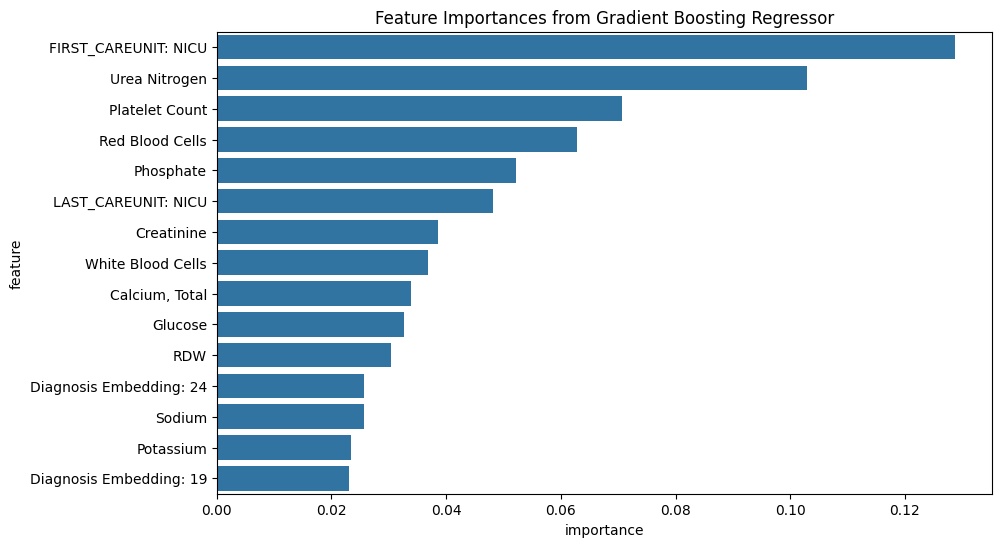

In [20]:
feature_importances_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': models["Gradient Boosting"].feature_importances_
}).sort_values(by = "importance", ascending = False)

plt.figure(figsize=(10, 6))
sns.barplot(x = 'importance', y = 'feature', data = feature_importances_gb.head(15))
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.show()

## Evaluation

In [29]:
eval_df = pd.DataFrame({
    "MAE": [2.76, 2.28, 2.36, 0.44],
    "R2": [0.21, 0.33, 0.31, 0.32]
}, index = ["Without Lab Results", "With Lab Results", "Results + Embeddings", "+ Scaling"])

In [30]:
eval_df

,MAE,R2
Without Lab Results,2.76,0.21
With Lab Results,2.28,0.33
Results + Embeddings,2.36,0.31
+ Scaling,0.44,0.32


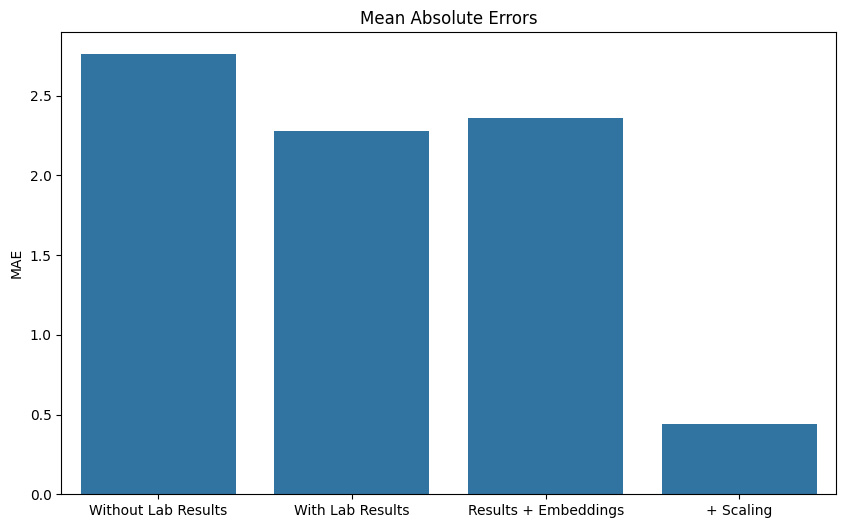

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x = eval_df.index, y = eval_df["MAE"])
plt.title('Mean Absolute Errors')
# plt.xticks(rotation = 45)
plt.xlabel("")
plt.show()

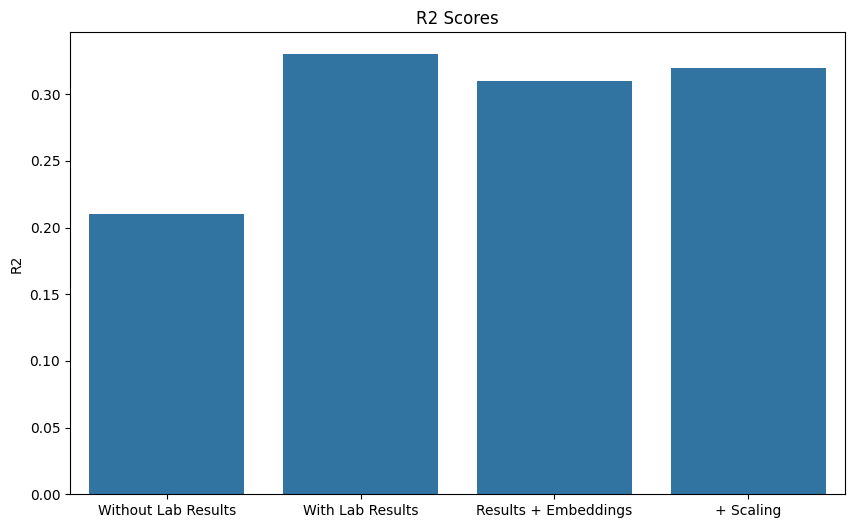

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x = eval_df.index, y = eval_df["R2"])
plt.title('R2 Scores')
# plt.xticks(rotation = 45)
plt.xlabel("")
plt.show()